In [1]:
import torch

from transformers import pipeline

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
pipe = pipeline(task="image-feature-extraction", model_name="google/vit-base-patch16-224", device=DEVICE, pool=True)

No model was supplied, defaulted to google/vit-base-patch16-224 and revision 3f49326 (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.


Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['vit.pooler.dense.bias', 'vit.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


In [2]:
import os
from pil
from PIL import Image
import requests
image_folder = r'D:\BIOMETRIC_PROJECT\IITD-Database'
list_of_folder  = [filename for filename in os.listdir(image_folder)]
image_paths = []
features_dict = {}
# print(list_of_folder)

id = 0
for i in range(len(list_of_folder)):

# for i in range(8):
    filename = list_of_folder[i]
    path =  os.path.join(image_folder, filename)
    left_files = []
    right_files = []
   
    for file in os.listdir(path):
        # print(file)
        if file[-5:]=="L.bmp":
            left_files.append(file)
        if file[-5:]=="R.bmp":
            right_files.append(file)
    for i in range(min(len(left_files),len(right_files))):
        # os.path.join(path, file)
        images = {"left":Image.open( os.path.join(path, left_files[i])).convert("RGB"),
                  "right":Image.open(os.path.join(path, right_files[i])).convert("RGB"),
                 "id":filename}
        # print(images)
        features_dict[str(id)] = images
        id = id+1



NameError: name 'Image' is not defined

In [ ]:

len([key for key in features_dict])
features_dict["0"]

In [5]:
len(features_dict)



1052

In [6]:
from PIL import Image, ImageOps
from torchvision import transforms
from datasets import Dataset


# Define data augmentation transforms for PIL images
data_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=30),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.RandomResizedCrop(size=(192, 192), scale=(0.8, 1.0)),
])

# Create a new dataset to store both original and augmented images


# Add original images to the new dataset

data_feature_label = {}
# Apply data augmentation and add augmented images to the new dataset
# for image, label, file_path in zip(dataset["image"], dataset["labels"], dataset["image_file_path"]):
id1 = 0
for item in features_dict:
    dict1 = features_dict[item]
    id_name = dict1["id"]
    images = {"left":pipe(dict1["left"]),"right":pipe(dict1["right"]),"id":id_name}
    data_feature_label[str(id1)] = images
    id1+=1

    # print(id_name,item)
    left_image = data_transform(dict1["left"])
    right_image = data_transform(dict1["right"])
    images = {"left":pipe(left_image),"right":pipe(right_image),"id":id_name}
    data_feature_label[str(id1)] = images
    id1+=1
   

    # # Append augmented image and corresponding label to the new dataset
    # combined_data["image_file_path"].append(f"{file_path}_augmented.jpg")  # Adjust the filename as needed
    # combined_data["image"].append(augmented_image)
    # combined_data["labels"].append(label)



In [190]:
len(data_feature_label)

import pickle


# # Open a file in binary write mode
# with open("data_new1.pickle", "wb") as f:
#     # Serialize and save the object to the file
#     pickle.dump(data_feature_label, f)


In [1]:

import pickle

with open("IITD_Features.pickle", "rb") as f:
    data = pickle.load(f)

len(data)
data_feature_label = data

In [2]:
len(data_feature_label)

2104

In [3]:
import pandas as pd


df = pd.DataFrame().from_dict(data_feature_label)
# df.to_csv("iitd_.csv")

In [4]:
import numpy as np
def generate_orthogonal_matrix(key):
    # Use the key to seed the random number generator
    np.random.seed(key)
    
    # Create a random 4x4 matrix
    random_matrix = np.random.rand(4, 4)
    
    # Perform Gram-Schmidt process to make the matrix orthogonal
    def gram_schmidt(A):
        Q, _ = np.linalg.qr(A)  # QR decomposition provides an orthogonal Q
        return Q

    orthogonal_matrix = gram_schmidt(random_matrix)
    orthogonal_vector = orthogonal_matrix.flatten().reshape(16, 1)
    
    
    return orthogonal_vector

In [5]:



# Example usage
images = []
labels_arr = []


for id1 in data_feature_label:
    vector_lx768 = np.array(data_feature_label[id1]["left"][0])
    vector_lx768 = vector_lx768.reshape(1, 768)
    # print(data_feature_label["0"])
    vector_rx768 = np.array(data_feature_label[id1]["right"][0])
    vector_rx768 = vector_rx768.reshape(1, 768)
    key = int(data_feature_label[id1]["id"])
    
    orthogonal_matrix = generate_orthogonal_matrix(key)
    
    left_projection_matrix = np.dot(orthogonal_matrix, vector_lx768)
    Right_projection_matrix = np.dot(orthogonal_matrix, vector_rx768)
    
    # print(left_projection_matrix.shape,Right_projection_matrix.shape)
    Cancelabel_matrix = np.multiply(left_projection_matrix, Right_projection_matrix)
    # for item in data_feature_label:
        # print(data_feature_label[item])
    # print(Cancelabel_matrix.shape)
    images.append(Cancelabel_matrix)
    labels_arr.append(data_feature_label[id1]["id"])
# print(result_matrix.shape)

In [5]:


# Example usage
images = []
labels_arr = []


for id1 in data_feature_label:
    vector_lx768 = np.array(data_feature_label[id1]["left"][0])
    vector_lx768 = vector_lx768.reshape(1, 768)
    # print(data_feature_label["0"])
    vector_rx768 = np.array(data_feature_label[id1]["right"][0])
    vector_rx768 = vector_rx768.reshape(1, 768)
    key = int(data_feature_label[id1]["id"])
    fuse_feature = np.multiply(vector_lx768, vector_rx768)
    orthogonal_matrix = generate_orthogonal_matrix(key)
    
    Cancelabel_matrix = np.dot(orthogonal_matrix, fuse_feature)
    # Right_projection_matrix = np.dot(orthogonal_matrix, vector_rx768)
    
    # # print(left_projection_matrix.shape,Right_projection_matrix.shape)
    # Cancelabel_matrix = np.multiply(left_projection_matrix, Right_projection_matrix)
    # for item in data_feature_label:
        # print(data_feature_label[item])
    # print(Cancelabel_matrix.shape)
    images.append(Cancelabel_matrix)
    labels_arr.append(data_feature_label[id1]["id"])
# print(result_matrix.shape)

In [7]:
Cancelabel_matrix.shape

(16, 768)

In [6]:
np.unique(labels_arr)

array(['014', '015', '016', '017', '018', '019', '020', '021', '022',
       '023', '024', '025', '026', '027', '028', '029', '030', '031',
       '032', '033', '034', '035', '036', '037', '038', '039', '040',
       '041', '042', '043', '044', '045', '046', '047', '048', '049',
       '050', '051', '052', '053', '054', '055', '056', '057', '058',
       '059', '060', '061', '062', '063', '064', '065', '066', '067',
       '068', '069', '070', '071', '072', '073', '074', '075', '076',
       '077', '078', '079', '080', '081', '082', '083', '084', '085',
       '086', '087', '088', '089', '090', '091', '092', '093', '094',
       '095', '096', '097', '098', '099', '100', '101', '102', '103',
       '104', '105', '106', '107', '108', '109', '110', '111', '112',
       '113', '114', '115', '116', '117', '118', '119', '120', '121',
       '122', '123', '124', '125', '126', '127', '128', '129', '130',
       '131', '132', '133', '134', '135', '136', '137', '138', '139',
       '140', '141',

In [8]:
len(images)

2104

In [12]:
from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import tensorflow.keras.layers as layers

num_classes =np.unique(labels_arr)
def create_cnn_model():
    model = Sequential([
        layers.Flatten(input_shape=(16,768,1)),  
        layers.Dense(100, activation='relu'),   # Flatten the input
        #layers.Dense(1024, activation='relu'), 
        layers.Dropout(0.5),                           # Dropout for regularization
        layers.Dense(225, activation='softmax')# Output layer for classification
    ])
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model
    # model.summary()



In [10]:
all_images = []
for i in range(2104):
    all_images.append(images[i].reshape( 16, 768, 1))
all_images[0].shape



(16, 768, 1)

Training for fold 1 ...
Epoch 1/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.0239 - loss: 5.2467 - val_accuracy: 0.2322 - val_loss: 3.9121
Epoch 2/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.2057 - loss: 3.6249 - val_accuracy: 0.6540 - val_loss: 2.1873
Epoch 3/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.4388 - loss: 2.2478 - val_accuracy: 0.8720 - val_loss: 1.1032
Epoch 4/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.5881 - loss: 1.5267 - val_accuracy: 0.9621 - val_loss: 0.5982
Epoch 5/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7303 - loss: 0.9874 - val_accuracy: 0.9905 - val_loss: 0.3450
Score for fold 1: Loss = 0.3449581265449524, Accuracy = 99.05213117599487%
Training for fold 2 ...
Epoch 1/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.0338 - loss: 5.2177 - val_accuracy: 0.2559 - val_loss: 3.8022
Epoch 2/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.2063 - loss: 3.5552 - val_accuracy: 0.6967 - val_loss: 2.

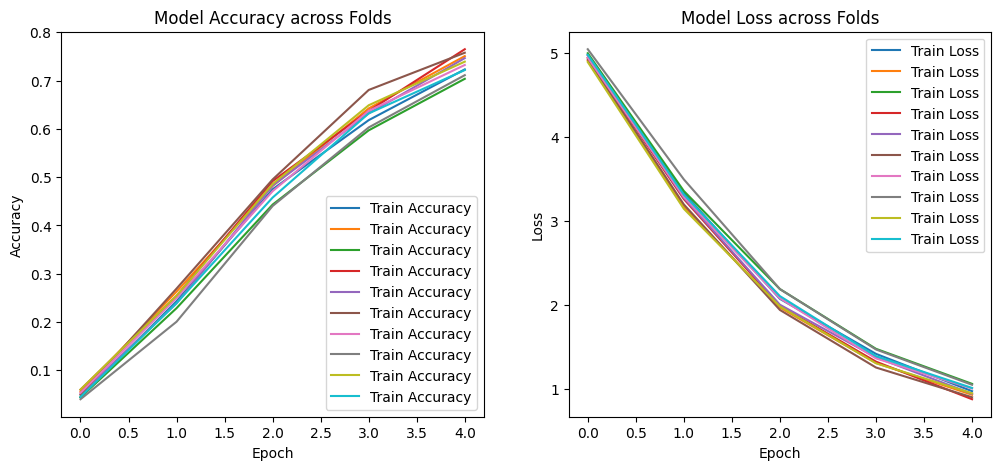

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

# Assuming `all_images` is your dataset and `labels_arr` is your label array
all_images = np.array(all_images).reshape(2104, 16, 768, 1)

# One-hot encode labels
num_classes = 225
y_data_cat = to_categorical(labels_arr, num_classes=num_classes)

# K-Fold Cross Validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
fold_no = 1
acc_per_fold = []
loss_per_fold = []

# Create lists to store accuracy and loss for all folds
accuracy_per_epoch = []
loss_per_epoch = []

for train_index, val_index in kf.split(all_images):
    # Split data
    X_train, X_val = all_images[train_index], all_images[val_index]
    y_train, y_val = y_data_cat[train_index], y_data_cat[val_index]
    
    # Initialize the CNN model (make sure `create_cnn_model` is defined)
    model = create_cnn_model()
    
    # Train the model
    print(f'Training for fold {fold_no} ...')
    history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val), verbose=1)
    
    # Capture the accuracy and loss for plotting
    accuracy_per_epoch.append(history.history['accuracy'])
    loss_per_epoch.append(history.history['loss'])
    
    # Evaluate the model
    scores = model.evaluate(X_val, y_val, verbose=0)
    print(f'Score for fold {fold_no}: Loss = {scores[0]}, Accuracy = {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
    
    fold_no += 1

# Summary of scores across folds
print('\nAverage scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')

# Plotting training history for accuracy and loss across all folds
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy for all folds
plt.subplot(1, 2, 1)
for accuracy in accuracy_per_epoch:
    plt.plot(accuracy, label='Train Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy across Folds')

# Plot training & validation loss for all folds
plt.subplot(1, 2, 2)
for loss in loss_per_epoch:
    plt.plot(loss, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss across Folds')

plt.show()




# X_train, X_test, y_train, y_test = train_test_split(all_images, labels_arr, test_size=0.2, random_state=42)



# y_train_cat = to_categorical(y_train, num_classes=225)
# y_test_cat = to_categorical(y_test, num_classes=225)



# history = model.fit(X_train, y_train_cat, epochs=5, batch_size=32, validation_data=(X_test, y_test_cat))


# test_loss, test_accuracy = model.evaluate(X_test, y_test_cat)



# print(f'Test Loss: {test_loss}')
# print(f'Test Accuracy: {test_accuracy}')

# # Plotting training history for accuracy and loss if desired
# import matplotlib.pyplot as plt


# plt.figure(figsize=(12, 5))
# plt.subplot(1, 2, 1)
# plt.plot(history.history['accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.title('Model Accuracy')

# # Plot training & validation loss
# plt.subplot(1, 2, 2)
# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.title('Model Loss')

# plt.show()

In [10]:
# model.save("best_model.h5")


In [3]:
# import keras
# keras.saving.save_model(model, "best_model.keras")

from tensorflow.keras.models import load_model

# Load the model
# model = load_model("best_model.keras")



D:\ENV\DEEP\Lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


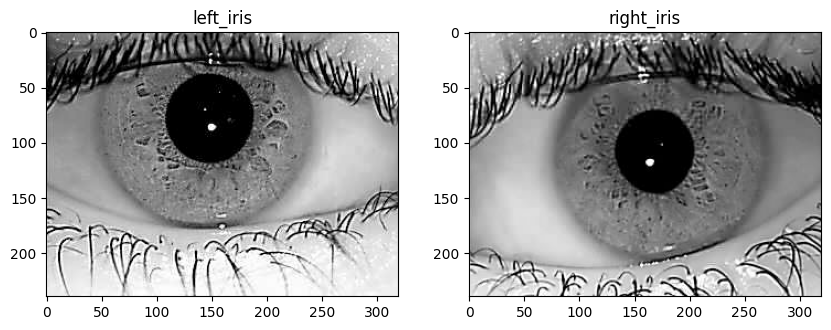

In [3]:
from PIL import Image
import matplotlib.pyplot as plt

left_iris = Image.open( r"D:\BIOMETRIC_PROJECT\IITD-Database\029\01_L.bmp").convert("RGB")
right_iris = Image.open(r"D:\BIOMETRIC_PROJECT\IITD-Database\029\06_R.bmp" ).convert("RGB")

fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

axes[0].imshow(left_iris)

axes[0].set_title("left_iris")

axes[1].imshow(right_iris)

axes[1].set_title("right_iris")

plt.show()

In [4]:

fv_left_iris = pipe(left_iris)
fv_right_iris = pipe(right_iris)



In [5]:
# print(fv_left_iris)

[[0.49814411997795105, 0.5882188677787781, -0.477336585521698, -0.6087053418159485, -0.5024818181991577, -0.7691591382026672, 0.574623703956604, -0.4757995903491974, 0.014654361642897129, -0.7227649092674255, -0.6347235441207886, 0.06183256953954697, -0.2844200134277344, -0.715637743473053, 0.3252284526824951, -0.6153336763381958, 0.8321302533149719, 0.39677637815475464, 0.18495097756385803, 0.21191416680812836, 0.424279123544693, 0.36100754141807556, 0.4487600326538086, -0.2247120440006256, 0.13065074384212494, -0.8539023995399475, 0.4775271415710449, -0.1999981552362442, -0.1394404023885727, 0.25399717688560486, 0.5135246515274048, -0.4913671910762787, -0.08689410239458084, -0.23959901928901672, -0.4089002311229706, 0.5930731892585754, -0.3411768972873688, -0.10342675447463989, -0.3743647336959839, -0.049545396119356155, -0.17972202599048615, -0.06648457795381546, -0.6604259610176086, 0.2099137306213379, -0.2308577299118042, 0.7289384007453918, 0.5407810807228088, -0.2131242007017135

In [15]:
import numpy as np
fv_left_iris = np.array(fv_left_iris).reshape(1, 768)
fv_right_iris = np.array(fv_right_iris).reshape(1, 768)
key = 29
orthogonal_matrix = generate_orthogonal_matrix(key)
left_projection_matrix = np.dot(orthogonal_matrix, fv_left_iris)
Right_projection_matrix = np.dot(orthogonal_matrix, fv_right_iris)
Cancelabel_matrix = np.multiply(left_projection_matrix, Right_projection_matrix)

In [16]:
# Cancelabel_matrix= Cancelabel_matrix.reshape( 16, 768, 1)

In [17]:
Cancelabel_matrix = np.expand_dims(Cancelabel_matrix, axis=-1)  # Shape becomes (16, 768, 1)
Cancelabel_matrix = np.expand_dims(Cancelabel_matrix, axis=0)   

In [18]:
Cancelabel_matrix.shape

(1, 16, 768, 1)

In [19]:

# Predict the class
predictions = model.predict(Cancelabel_matrix)
predicted_class = np.argmax(predictions, axis=1)  # Get the index of the highest probability
# print(predictions)
print("Predicted class:", predicted_class[0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Predicted class: 29


In [15]:
import torch
import os
from PIL import Image
import torchvision
import datasets
import pickle
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn import __version__ as sklearn_version
import matplotlib

# Dictionary to store versions
versions = {
    "torch": torch.__version__,
    "os": os.__doc__.splitlines()[0],  # os module doesn't have a version
    "PIL": Image.__version__,
    "torchvision": torchvision.__version__,
    "datasets": datasets.__version__,
    "pickle": "Built-in module, version depends on Python version.",
    "pandas": pd.__version__,
    "numpy": np.__version__,
    "tensorflow": tf.__version__,
    "sklearn": sklearn_version,
    "matplotlib": matplotlib.__version__
}

# Print the versions
for lib, version in versions.items():
    print(f"{lib}: {version}")


torch: 2.4.1+cpu
os: OS routines for NT or Posix depending on what system we're on.
PIL: 10.4.0
torchvision: 0.19.1+cpu
datasets: 3.0.0
pickle: Built-in module, version depends on Python version.
pandas: 2.2.2
numpy: 1.26.4
tensorflow: 2.17.0
sklearn: 1.5.2
matplotlib: 3.9.2
